In [2]:
import pandas as pd

In [104]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv(r"C:\Users\saad1\Downloads\Python-Time-Series-Forecasting\Python - Time Series Forecasting\Time Series Analysis\Introduction to Time Series Forecasting\bitcoin_price.csv")

In [93]:
df_choco = pd.read_csv(r"C:\Users\saad1\Documents\Python_Time_Series\Time_Series_Files\Time Series Analysis\Introduction to Time Series Forecasting\choco_monthly_revenue.csv", index_col='Month with Year', parse_dates=['Month with Year'])
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


In [94]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,pct_change_Close,30_day_rolling_volume,year,month,day,day_of_week,name_of_day,weekday_numeric,is_weekend,lag_1,lag_2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,0,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,0,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,0,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,1,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,1,408.903992,394.795990


In [5]:
df['Date'].min(), df['Date'].max()

('2014-09-17', '2023-12-30')

In [6]:
df.shape

(3392, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3392.000000,3392.000000,3392.000000,3392.000000,3392.000000,3.392000e+03
mean,14563.945437,14904.519086,14197.148352,14574.914414,14574.914414,1.654903e+10
std,16182.363674,16570.758411,15746.886508,16184.518031,16184.518031,1.908743e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,910.350998,923.463760,896.557251,915.989243,915.989243,1.554558e+08
50%,8237.044922,8394.890137,8034.995117,8244.671875,8244.671875,1.146727e+10
75%,23743.839844,24205.182129,23243.770508,23776.682129,23776.682129,2.686730e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


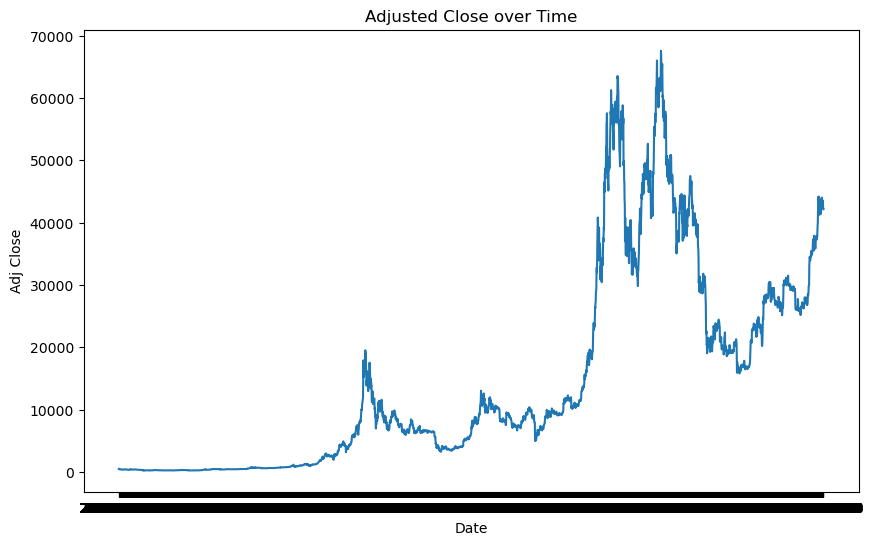

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace with your own data):
# df = pd.DataFrame({
#     'Date': pd.date_range(start='2021-01-01', periods=10, freq='D'),
#     'Adj Close': [100, 102, 101, 103, 105, 107, 106, 108, 110, 112]
# })

# Assuming df already contains 'Date' and 'Adj Close' columns:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Adjusted Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3392 non-null   object 
 1   Open       3392 non-null   float64
 2   High       3392 non-null   float64
 3   Low        3392 non-null   float64
 4   Close      3392 non-null   float64
 5   Adj Close  3392 non-null   float64
 6   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 185.6+ KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3392 non-null   datetime64[ns]
 1   Open       3392 non-null   float64       
 2   High       3392 non-null   float64       
 3   Low        3392 non-null   float64       
 4   Close      3392 non-null   float64       
 5   Adj Close  3392 non-null   float64       
 6   Volume     3392 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 185.6 KB


In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [16]:
df.set_index('Date', inplace=True)

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [19]:
df1 = df.resample("MS").mean()
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-01,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-01,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-01,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07
2014-12-01,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-01,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07


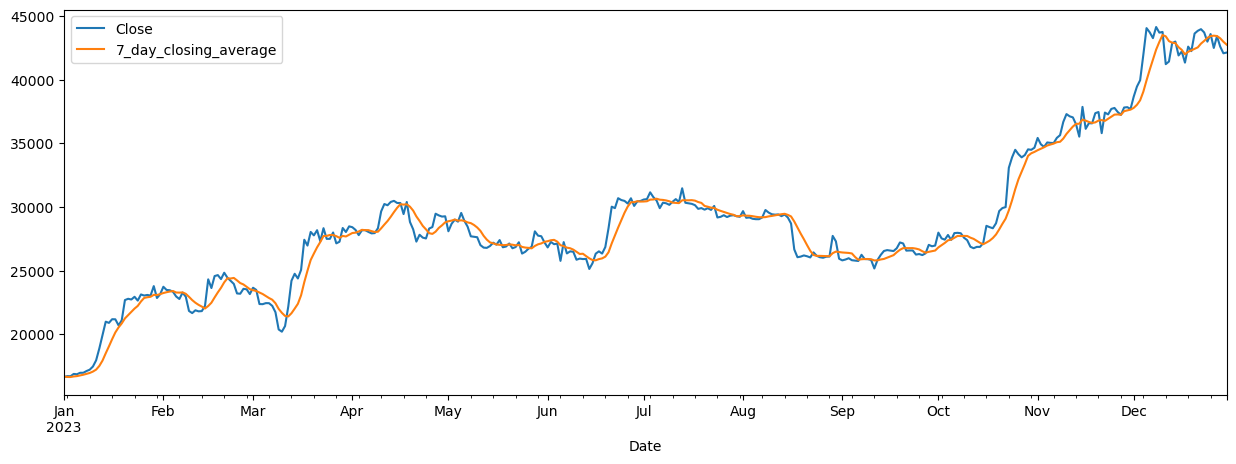

In [26]:
df['7_day_closing_average'] = df['Close'].rolling(7).mean()
df[['Close','7_day_closing_average']].loc['2023'].plot(figsize=(15,5))
plt.show()

In [35]:
df.groupby(df.index.month)['Close'].mean().idxmax()

4

In [39]:
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [42]:
df['pct_change_Close'] = df['Close'].pct_change()*100

In [43]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,pct_change_Close
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854


In [46]:
df[abs(df['Close'].pct_change())*100>10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,pct_change_Close
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


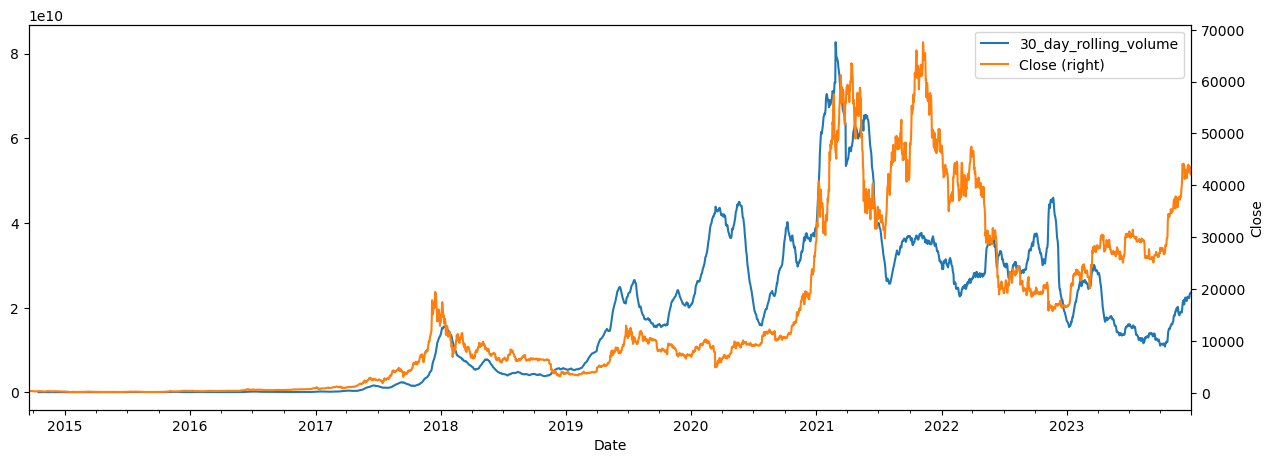

In [51]:
df['30_day_rolling_volume'] = df['Volume'].rolling(window=30).mean()
df[['30_day_rolling_volume']].plot(figsize=(15,5),legend=True)
ax = df['Close'].plot(figsize=(15,5),secondary_y=True, legend=True)
ax.set_ylabel("Close")
plt.show()


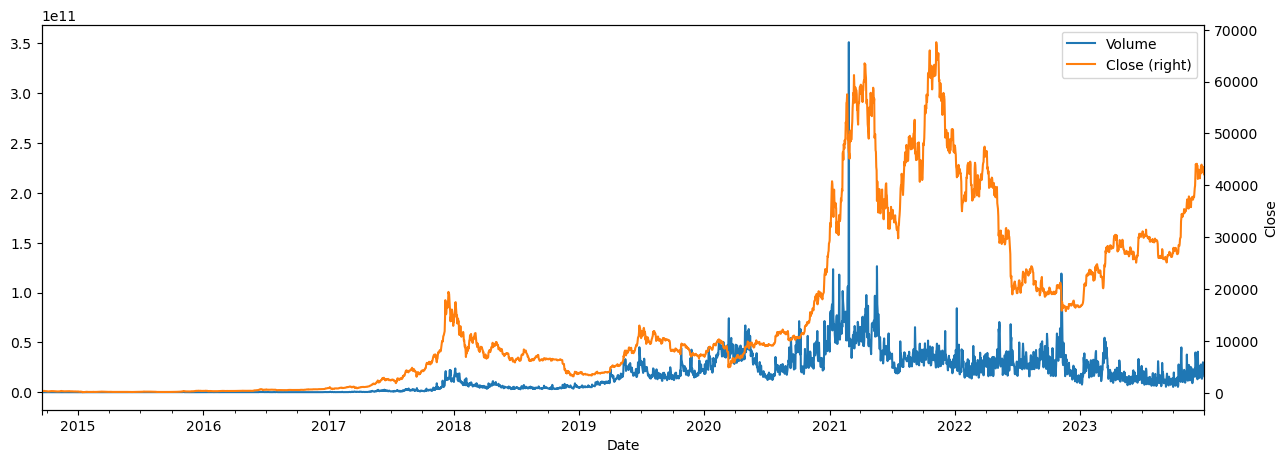

In [57]:
#df['30_day_rolling_volume'] = df['Volume'].rolling(window=30).mean()
df[['Volume']].plot(figsize=(15,5),legend=True)
ax = df['Close'].plot(figsize=(15,5),secondary_y=True, legend=True)
ax.set_ylabel("Close")
plt.show()


In [58]:
import numpy as np

def cross_correlation(x, y, max_lag=3, normalize=False):
    """
    Compute the cross-correlation of two same-length 1D arrays and return
    only the values for lags in the range [-max_lag, max_lag].
    
    Args:
        x, y:           1D NumPy arrays (same length).
        max_lag (int):  The maximum lag (positive or negative) to return.
        normalize (bool): 
            If True, scale each cross-correlation value into [-1, 1].
    
    Returns:
        lags:  1D array of lag values in [-max_lag, +max_lag].
        rxy:   Cross-correlation values for the corresponding lags.
    """
    # Ensure x, y are arrays and have the same length
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)
    
    # Step 1) Compute "full" cross-correlation
    # (This will give all possible lags from -(n-1) to +(n-1).)
    r_full = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
    
    # Step 2) Create the matching array of full_lags
    # full_lags will be: - (n-1), ..., -1, 0, 1, ..., (n-1)
    full_lags = np.arange(-(n - 1), n)
    
    # If normalize=True, divide by product of std devs (for the overlapping portion)
    if normalize:
        denom = np.sqrt(np.sum((x - np.mean(x))**2) * np.sum((y - np.mean(y))**2))
        r_full = r_full / denom
    
    # Step 3) Slice out only lags in [-max_lag, +max_lag]
    mask = (full_lags >= -max_lag) & (full_lags <= max_lag)
    
    # Filter both the correlation array and the lags
    lags = full_lags[mask]
    rxy = r_full[mask]
    
    return lags, rxy

# Example usage:
# Suppose df has columns '30_day_rolling_volume' and 'Close'
# We'll request only -3 to +3 lags:
x = df['Volume']
y = df['Close']

lags, rxy = cross_correlation(x, y, max_lag=5, normalize=True)

print("Lags:", lags)
print("Cross-correlation:", rxy)


Lags: [-5 -4 -3 -2 -1  0  1  2  3  4  5]
Cross-correlation: [0.67831243 0.67791118 0.67862109 0.6777245  0.67842907 0.6781488
 0.67892786 0.67946226 0.67845542 0.67862666 0.67837553]


In [59]:
df.isnull().sum()

Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
7_day_closing_average     6
pct_change_Close          1
30_day_rolling_volume    29
dtype: int64

In [60]:
df['30_day_rolling_volume'] = df['30_day_rolling_volume'].bfill()

In [61]:
df['7_day_closing_average'] = df['7_day_closing_average'].interpolate(method='linear')

In [62]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['name_of_day'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday


In [64]:
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,pct_change_Close,30_day_rolling_volume,year,month,day,day_of_week,name_of_day,weekday_numeric
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,NaN,0.835210,3.624856e+07,2014,9,22,0,Monday,0
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500,417.462572,8.364742,3.624856e+07,2014,9,23,1,Tuesday,1


In [65]:
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

In [66]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_average,pct_change_Close,30_day_rolling_volume,year,month,day,day_of_week,name_of_day,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,1


In [80]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

In [81]:
df_2017 = df[df.index.year == 2017]['Close'].resample('ME').mean()
df_2017


Date
2017-01-31      914.916159
2017-02-28     1062.533672
2017-03-31     1129.365228
2017-04-30     1206.641007
2017-05-31     1895.383529
2017-06-30     2636.204346
2017-07-31     2519.418386
2017-08-31     3880.989998
2017-09-30     4064.836312
2017-10-31     5360.071604
2017-11-30     7813.132975
2017-12-31    15294.270980
Freq: ME, Name: Close, dtype: float64

In [67]:
df['lag_1'] = df['Close'].shift(1)
df['lag_2'] = df['Close'].shift(2)

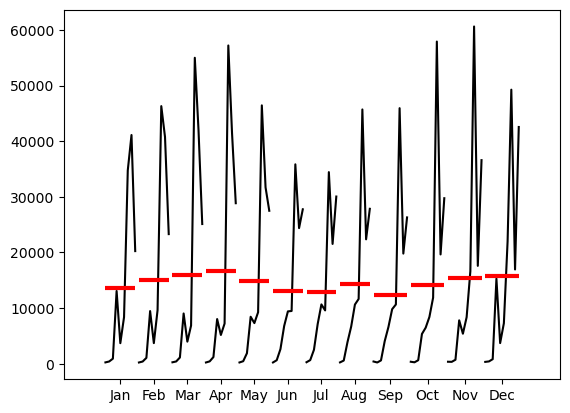

In [83]:
month_plot(df['Close'].resample('ME').mean())
plt.show()

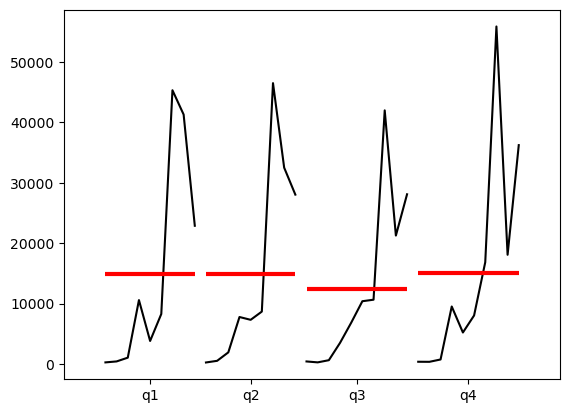

In [84]:
quarter_plot(df['Close'].resample('QE').mean())
plt.show()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


C:\Users\saad1\AppData\Local\Temp\ipykernel_6056\3101701058.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df_choco['revenue'].resample('M').mean(),


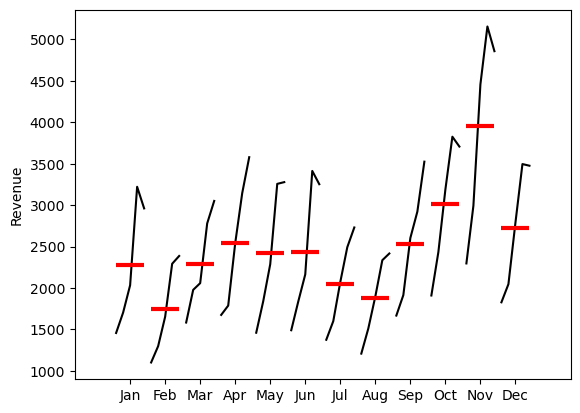

In [96]:
month_plot(df_choco['revenue'].resample('M').mean(),
           ylabel='Revenue')
plt.show()

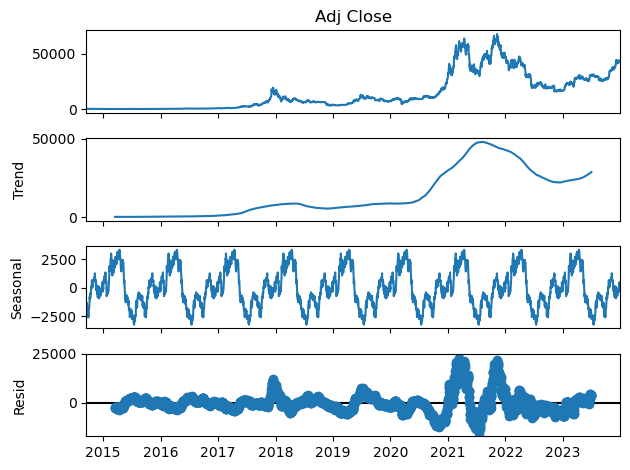

In [101]:
decompostition = seasonal_decompose(df['Adj Close'], model='additive', period=365)
decompostition.plot()
plt.show()

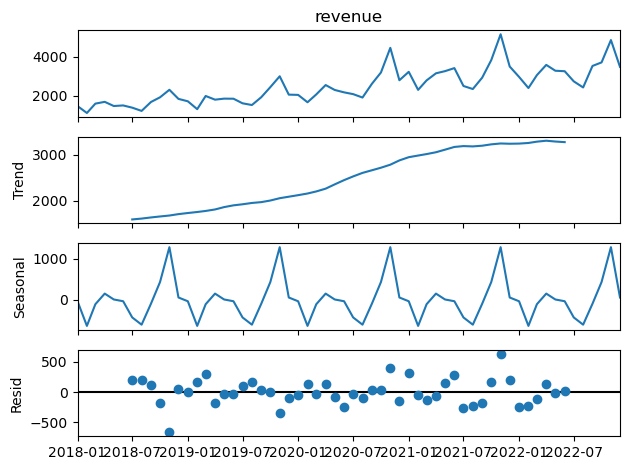

In [102]:
decompostition = seasonal_decompose(df_choco['revenue'], model='additive', period=12)
decompostition.plot()
plt.show()

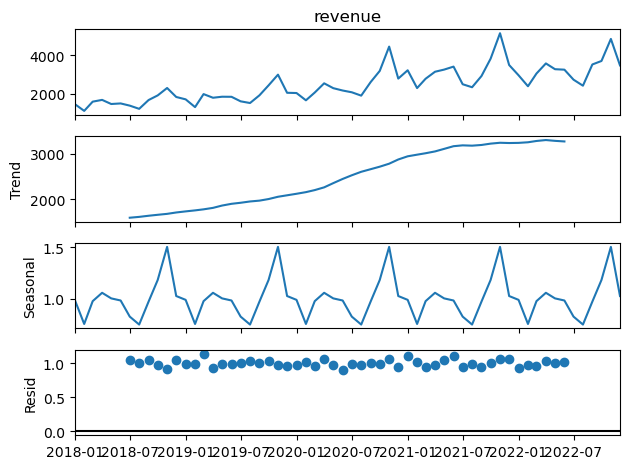

In [103]:
decompostition = seasonal_decompose(df_choco['revenue'], model='multiplicative', period=12)
decompostition.plot()
plt.show()

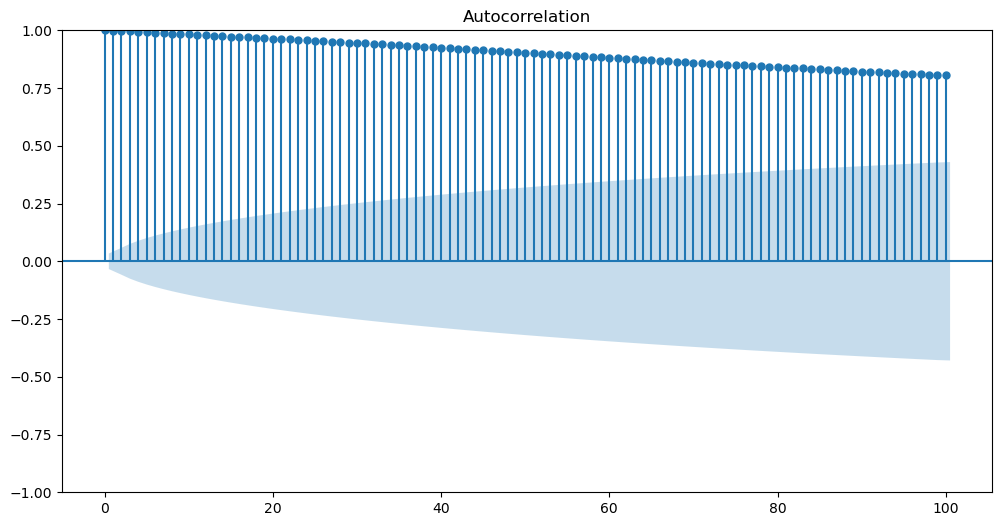

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(df['Close'], lags=100, ax=ax)
plt.show()

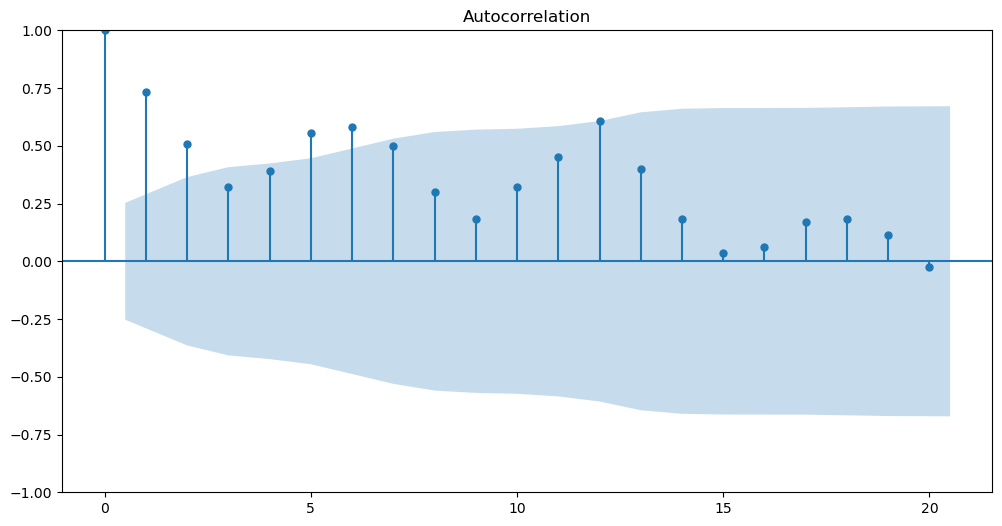

In [109]:
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(df_choco['revenue'], lags=20, ax=ax)
plt.show()

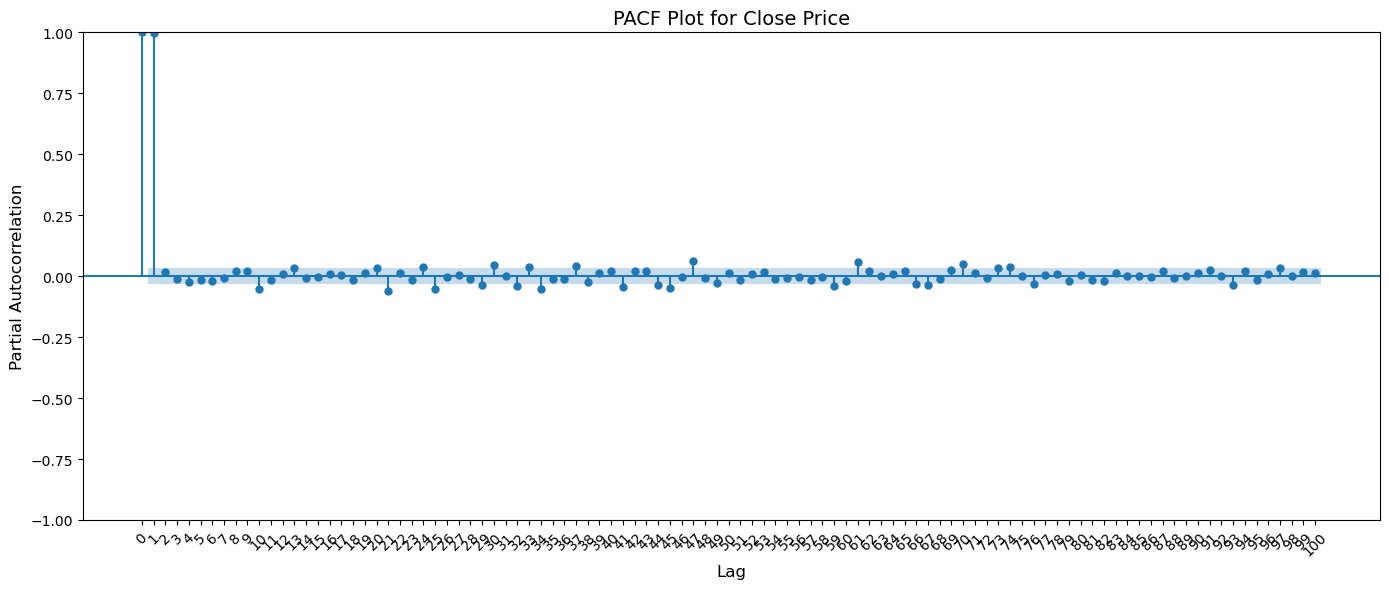

In [112]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(14, 6))

# Plot PACF with 100 lags
plot_pacf(df['Close'], lags=100, ax=ax)

# Set clear x-axis ticks for each lag
ax.set_xticks(range(0, 101))  # from lag 0 to lag 100 inclusive

# Rotate labels 45 degrees for clear readability
ax.set_xticklabels(range(0, 101), rotation=45)

# Label axes
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('Partial Autocorrelation', fontsize=12)
ax.set_title('PACF Plot for Close Price', fontsize=14)

# Display plot
plt.tight_layout()
plt.show()


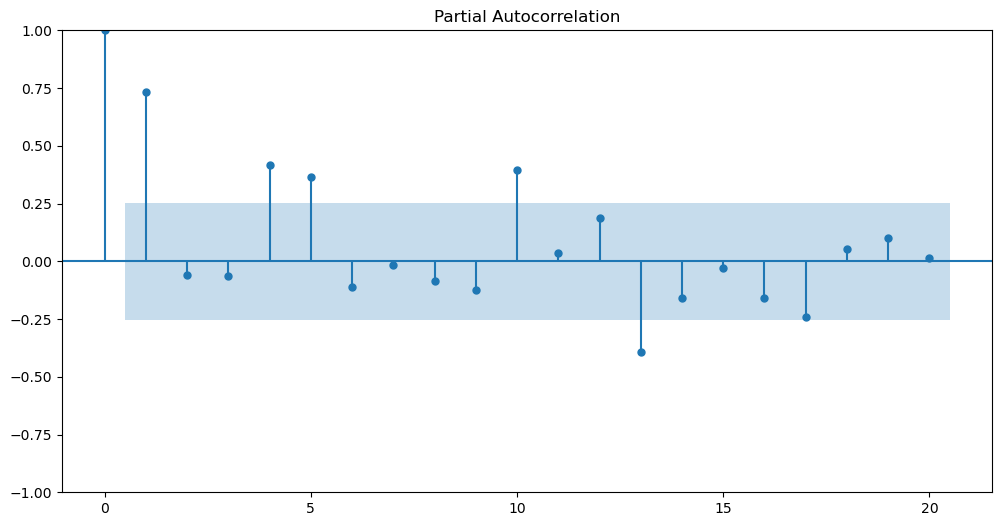

In [113]:
fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(df_choco['revenue'], lags=20, ax=ax)
plt.show()